# Table of Contents
<a id="toc"></a>
- [1. Data Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Data Exploaring and Preparation](#3)
    - [3.1 Diminsions of the data](#3.1)
- [4. EDA](#4)
    - [4.1 Visualizations](#4.1)
    - [4.2 Distrbution of the target variable](#4.2)
- [5. Feature Engineering](#5)
- [6. Scalling and Assigning Feature and Target variables](#6)
- [7. Spliting the Data into Training and Testing Data](#7)
- [8. Modeling](#8)
    - [8.1 Logistic Regression](#8.1)
    - [8.2 Random Forest](#8.2)
    - [8.3 KNN](#8.3)
    - [8.4 Bagging](#8.4)
    - [8.5 Gradient Boosting](#8.5)
    - [8.6 Decision Tree](#8.6)
    - [8.7 SVM](#8.7)
- [9. TP, TN, FP, FN](#9)
    - [9.1 Logistic Regression](#9.1)
    - [9.2 Random Forest](#9.2)
    - [9.3 KNN](#9.3)
    - [9.4 Bagging](#9.4)
    - [9.5 Gradient Boosting](#9.5)
    - [9.6 Decision Tree](#9.6)
    - [9.7 SVM](#9.7)
- [10. Auto Machine Learning](#10)

<a id = '2'></a>
# Import Necssaries Libraries

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tpot import TPOTClassifier

import warnings
warnings.filterwarnings("ignore")

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='3'></a>
# Data Exploaring and Preparation

In [32]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<a id='3.1'></a>
**Diminsions of the data**

In [33]:
df.shape # 195 rows and 24 features

(195, 24)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [35]:
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [36]:
df['MDVP:Jitter(Abs)'].value_counts()

0.000030    46
0.000040    28
0.000020    28
0.000010    20
0.000050    17
0.000060    16
0.000080     9
0.000070     8
0.000090     5
0.000009     5
0.000100     3
0.000150     2
0.000110     2
0.000140     1
0.000120     1
0.000220     1
0.000007     1
0.000260     1
0.000160     1
Name: MDVP:Jitter(Abs), dtype: int64

**All the features are continous**

In [37]:
df.columns[df.isna().any()] # No null values

Index([], dtype='object')

In [38]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [39]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='4'></a>
# EDA

In [40]:
FEATURES = [col for col in df.columns if col not in ['name', 'status']]

In [41]:
FEATURES

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

<a id='4.1'></a>
***Visualization***

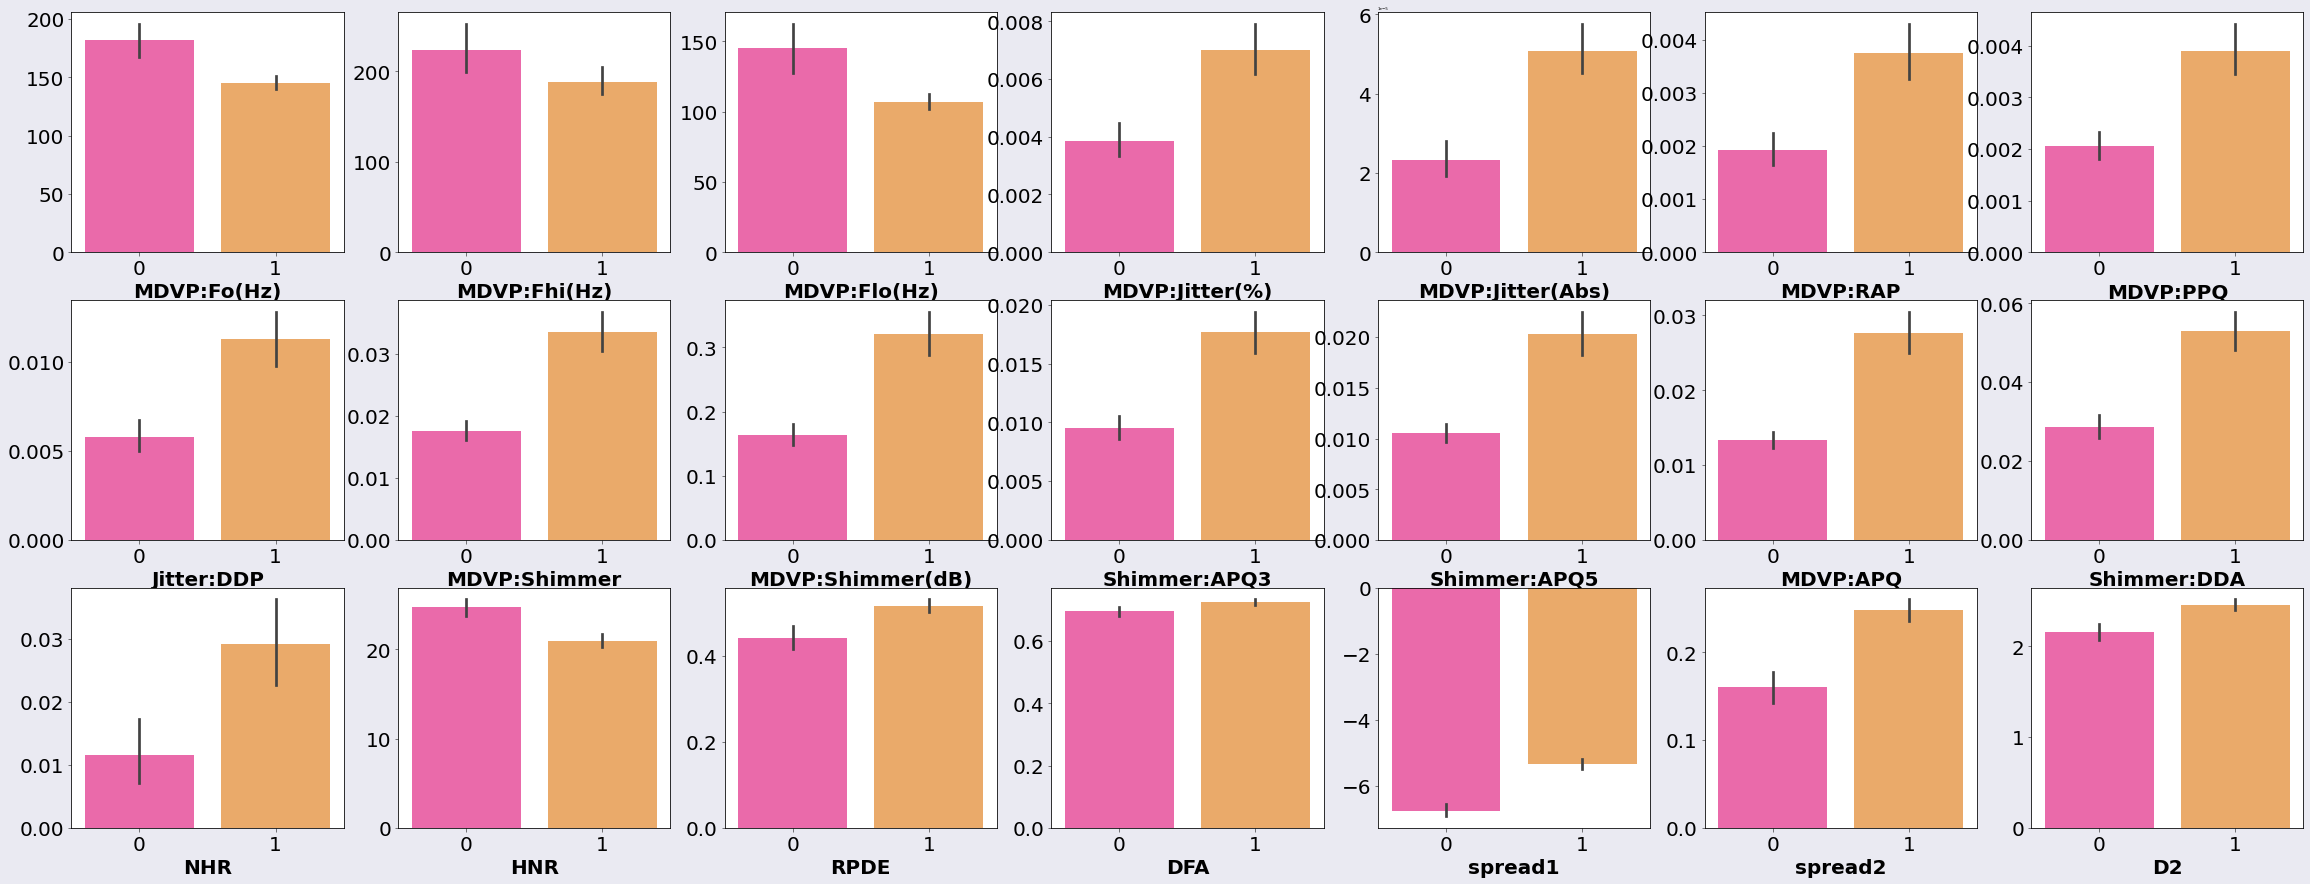

In [42]:
# barplot to all the continous features (target variable status on x-axis, continous features on y-axis)
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.barplot(y=df[col], x=df['status'], ax=axes[r, c], palette='spring')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

**conclusion from the barplots:**<br><br>
   * When these values of these features [MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), HNR] increase, pepole in the data are more likely to be in good health 
   * the rest of the features when increase Most pepole in the data have Parkinson's disease

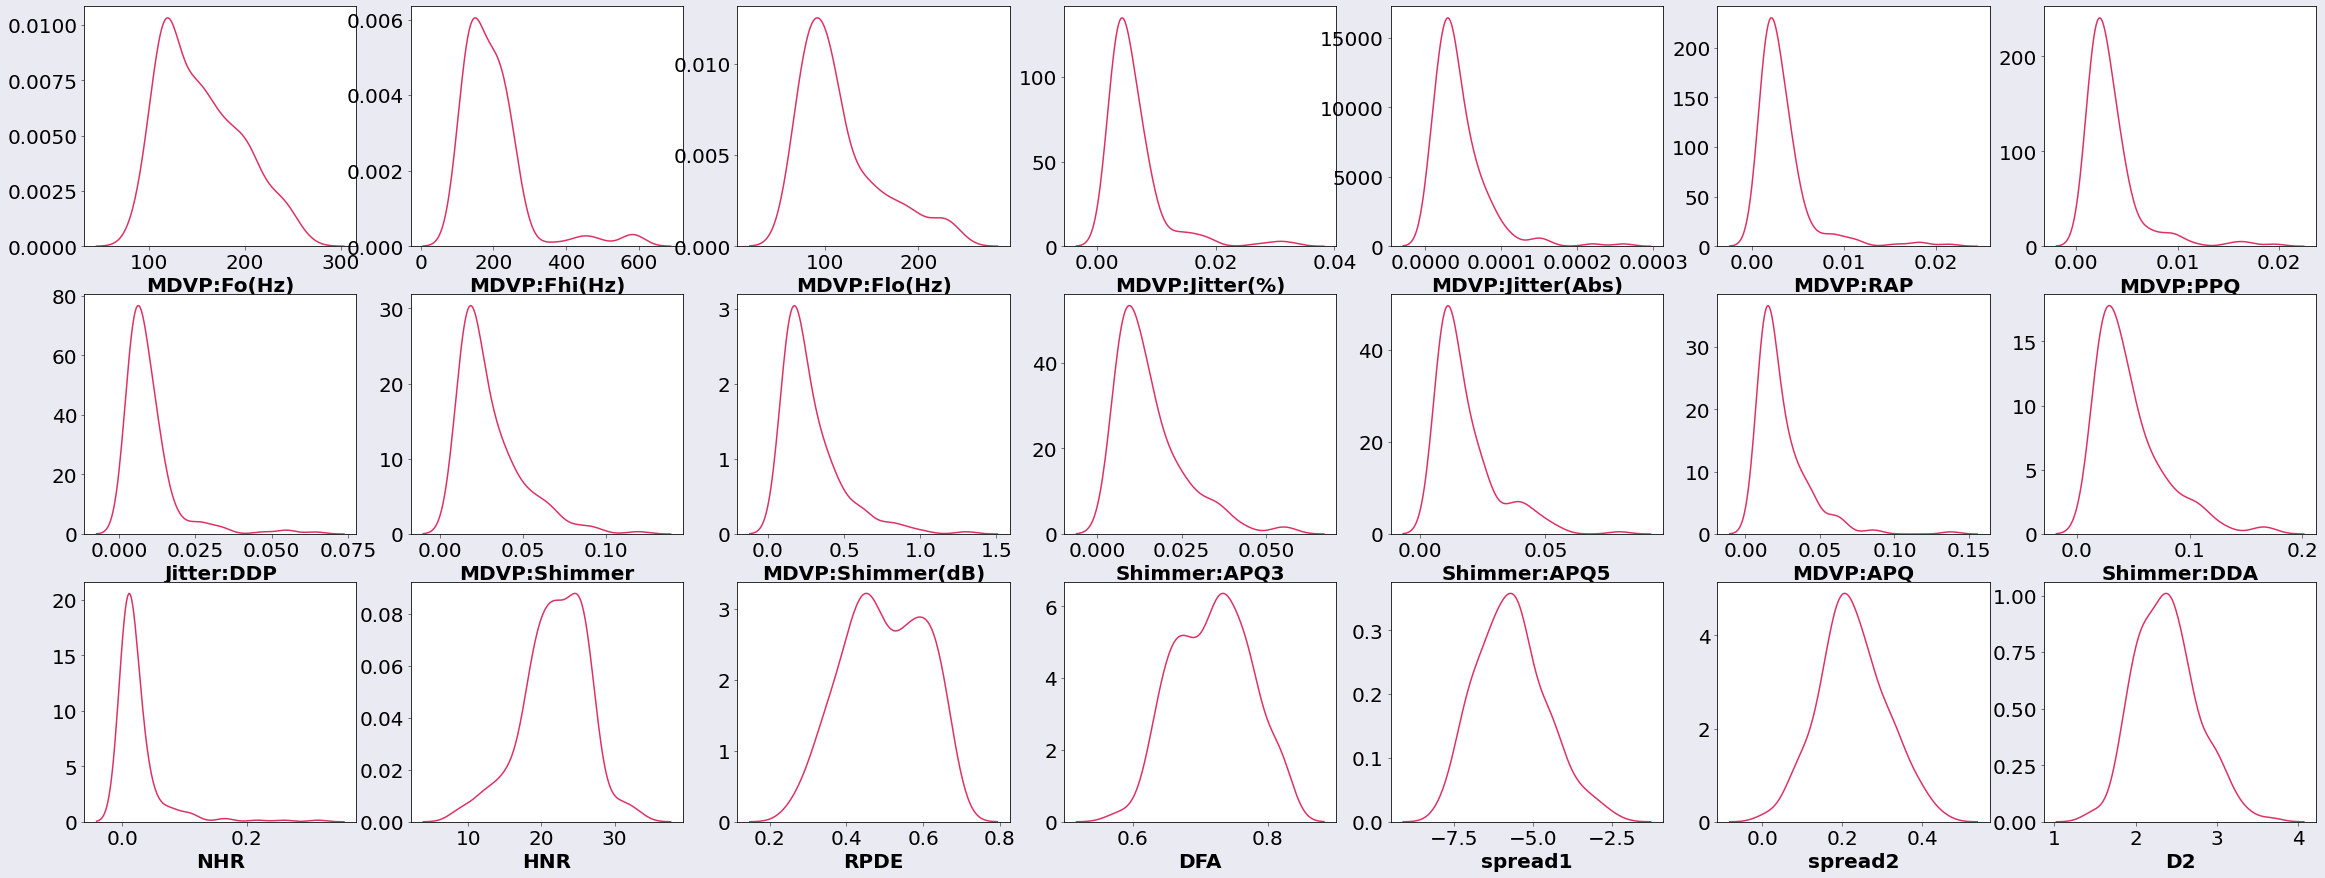

In [43]:
# Distrbution for all the continous features
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.kdeplot(x=df[col], ax=axes[r, c], color='#DE3163')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

**conclusion from the kdeplots:**<br><br>
- all the features are skewed to the right except (HNR, RPDE, DFA, spread1, spread2, D2) are approximatly normal distrbution

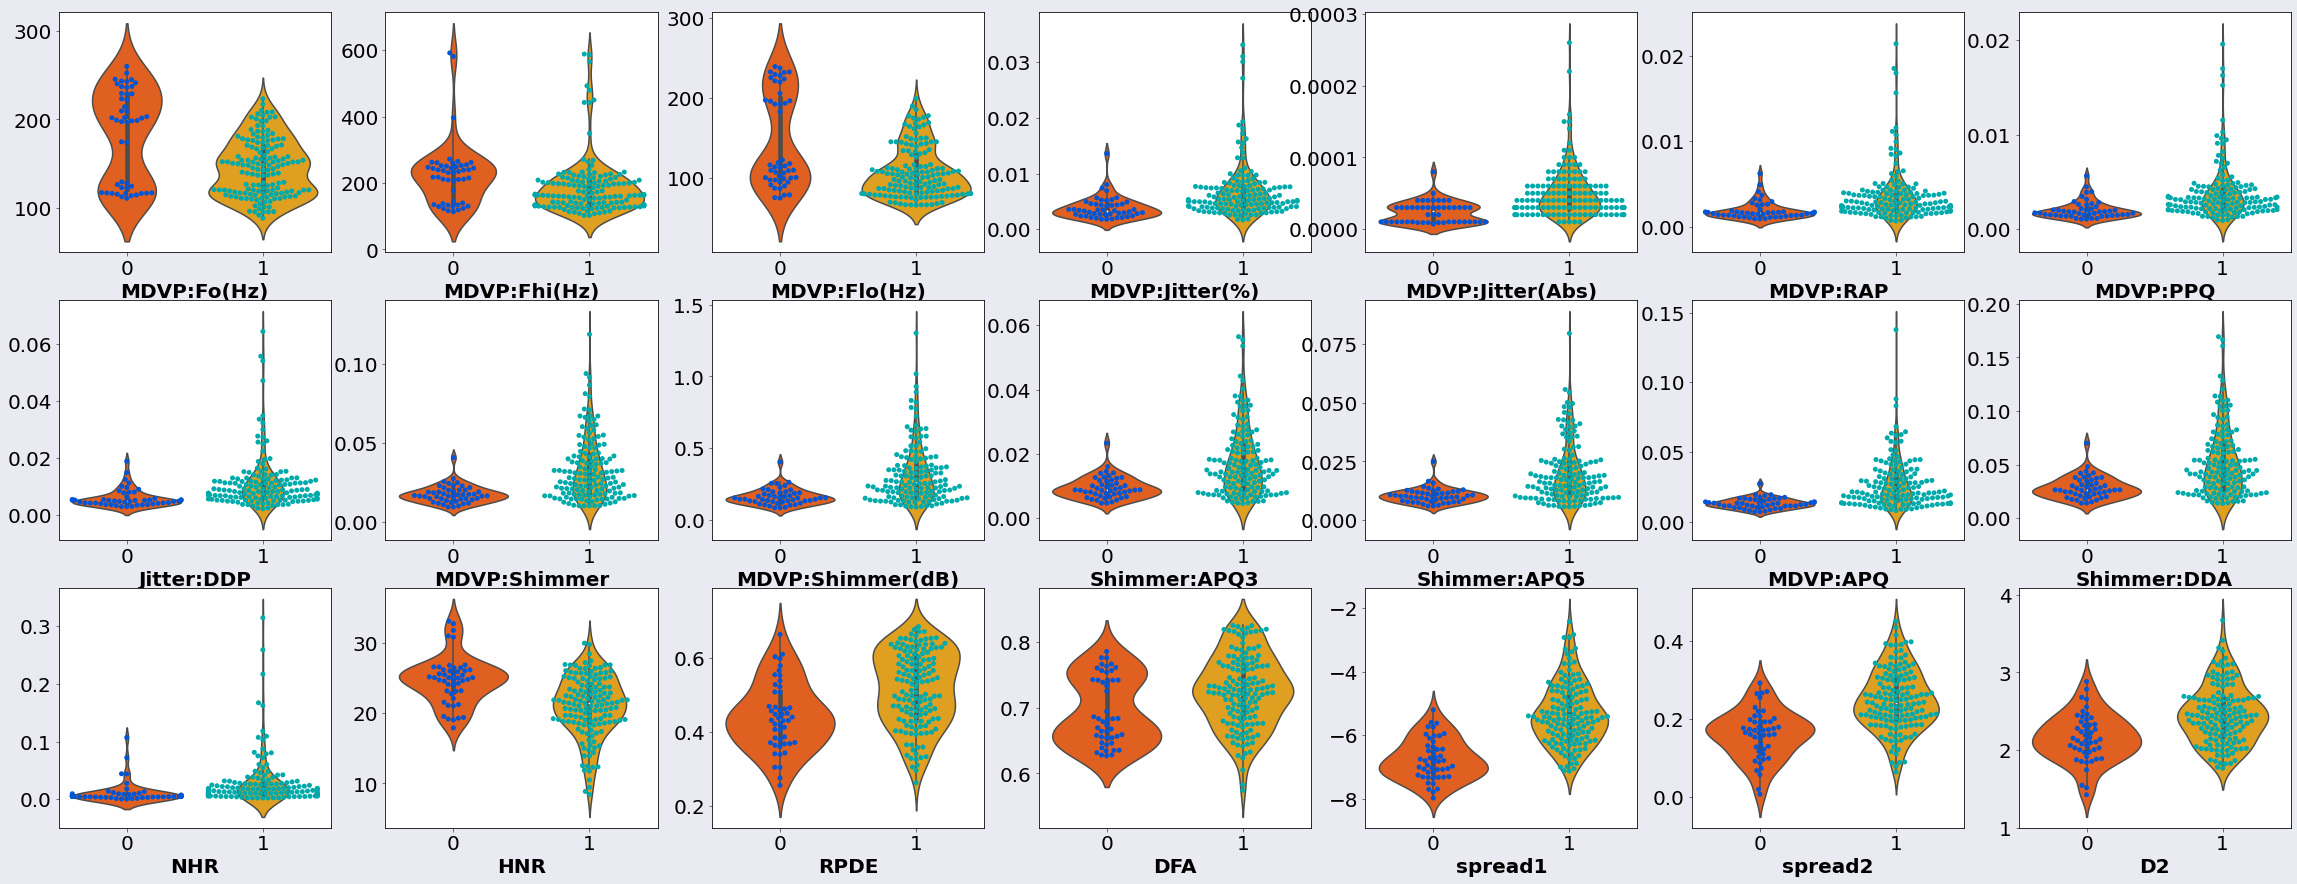

In [44]:
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.violinplot(y=df[col], x=df['status'], ax=axes[r, c], palette='autumn')
        sns.swarmplot(y=df[col], x=df['status'], ax=axes[r, c], palette='winter')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

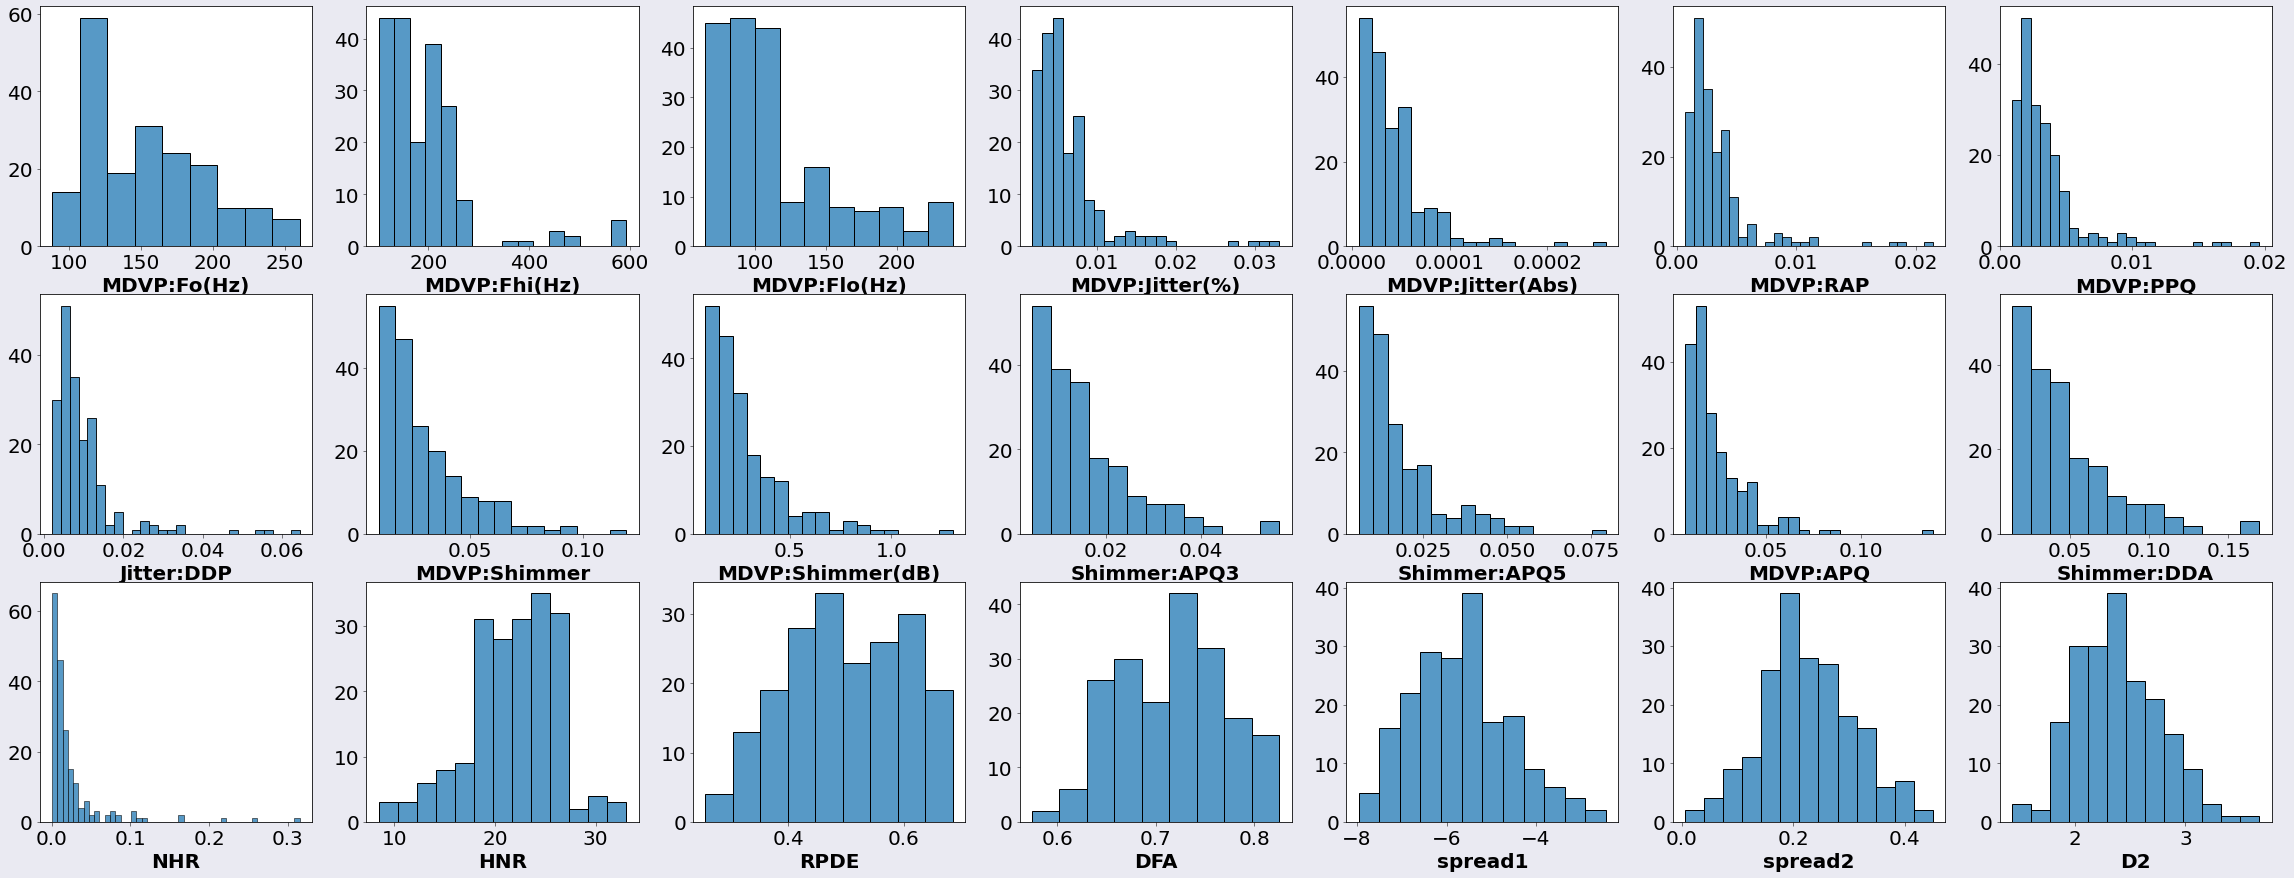

In [45]:
# barplot to all the continous features (target variable status on x-axis, continous features on y-axis)
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.histplot(x=df[col], ax=axes[r, c], palette='spring')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

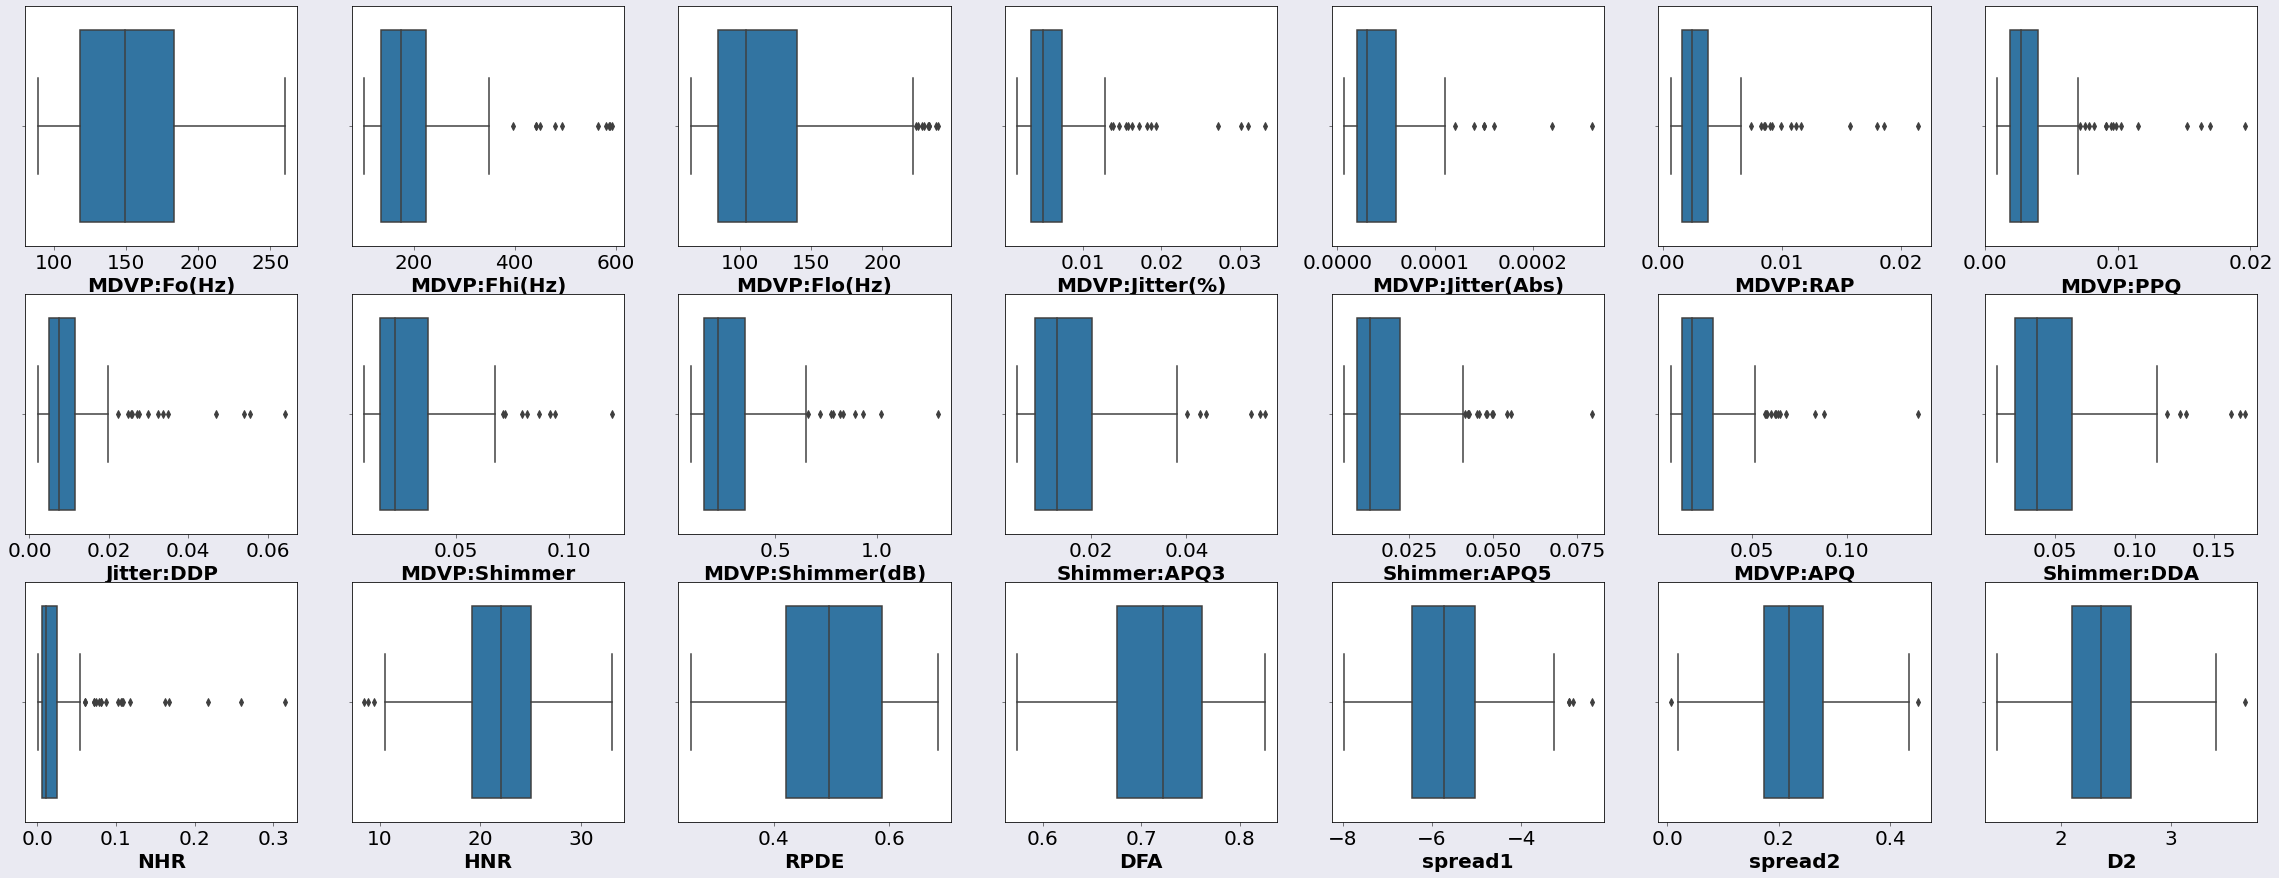

In [46]:
# boxplot for all the features
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.boxplot(x=df[col], ax=axes[r, c])
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

In [47]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [48]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [49]:
status_df = df.copy()

In [50]:
status_df.status.unique()

array([1, 0], dtype=int64)

In [51]:
status_df.status = status_df.status.apply(lambda x: 'Sick' if x == 1 else 'Healthy')

In [52]:
status_df.status.unique()

array(['Sick', 'Healthy'], dtype=object)

In [53]:
status_df.status.value_counts()

Sick       147
Healthy     48
Name: status, dtype: int64

<a id='4.2'></a>
***Distrbution of the target variable***

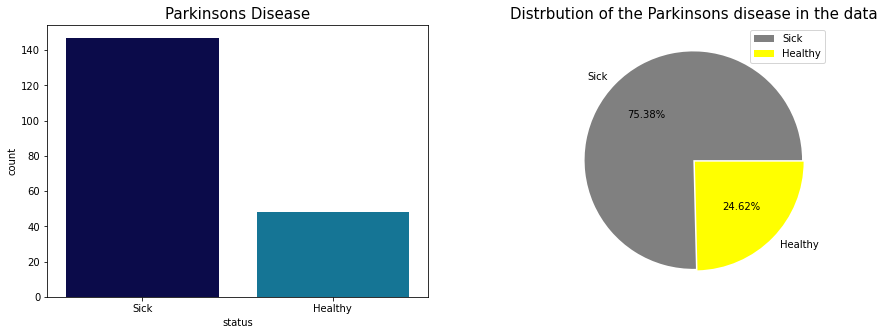

In [54]:
plt.figure(figsize=(15,11))

plt.subplot(2,2,1)
plt.title('Parkinsons Disease', {'fontsize':'15'})
sns.countplot(x='status', data=status_df, palette='ocean');

plt.subplot(2,2,2)
yes = status_df.status[status_df.status == 'Sick'].count()
no = status_df.status[status_df.status == 'Healthy'].count()
plt.title("Distrbution of the Parkinsons disease in the data", {'fontsize':'15'})
plt.pie([yes, no], labels=['Sick', 'Healthy'], autopct="%.2f%%", explode = [0.01,0.01], colors=['gray', 'yellow'])
plt.legend()
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='5'></a>
# Feature Engineering

In [55]:
df["mean"] = df[FEATURES].mean(axis=1)
df["std"] = df[FEATURES].std(axis=1)
df["min"] = df[FEATURES].min(axis=1)
df["max"] = df[FEATURES].max(axis=1)

FEATURES.extend(['mean', 'std', 'min', 'max'])

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='6'></a>
# Scalling and Assigning Feature and Target variables

In [56]:
scaler = StandardScaler()
for col in FEATURES:
    df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1,1))
    
X = df[FEATURES].to_numpy()
y = df['status'].to_numpy()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id ='7'></a>
# Spliting the Data into Training and Testing Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='8'></a>
# Modeling

In [ ]:
sns.histplot()

In [58]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True);
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='8.1'></a>
## Logistic Regression

In [59]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 80.26315789473685%
Logistic Regression model score on Training data: 85.61643835616438%
Logistic Regression model score on Testing data: 91.83673469387756%


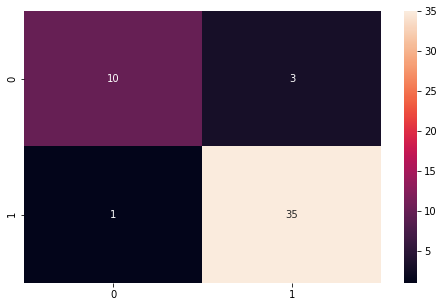

In [60]:
conf_matrix(lr_model)

In [61]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.92      0.97      0.95        36

    accuracy                           0.92        49
   macro avg       0.92      0.87      0.89        49
weighted avg       0.92      0.92      0.92        49



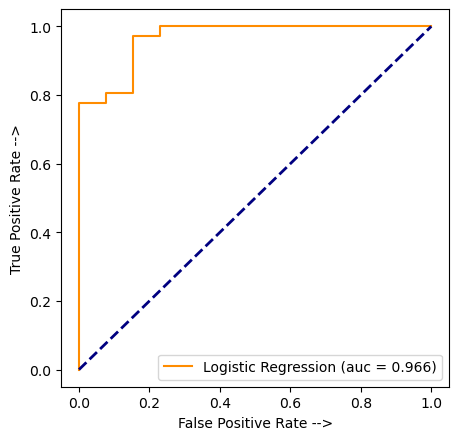

In [62]:
roc(lr_model, "Logistic Regression")

<a id='8.2'></a>
## Random Forest

In [73]:
rf_model = RandomForestClassifier(n_estimators=90)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 84.42105263157896%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 93.87755102040816%


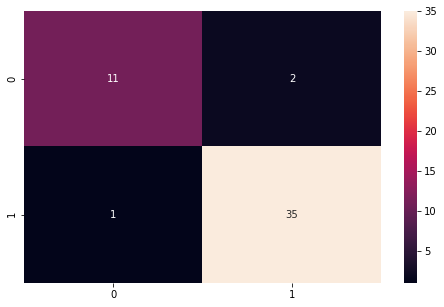

In [74]:
conf_matrix(rf_model)

In [75]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.95      0.97      0.96        36

    accuracy                           0.94        49
   macro avg       0.93      0.91      0.92        49
weighted avg       0.94      0.94      0.94        49



<a id='8.3'></a>
## KNN

In [80]:
knn_model = KNeighborsClassifier(n_neighbors=1)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 86.02631578947367%
KNN model score on Training data: 100.0%
KNN model score on Testing data: 95.91836734693877%


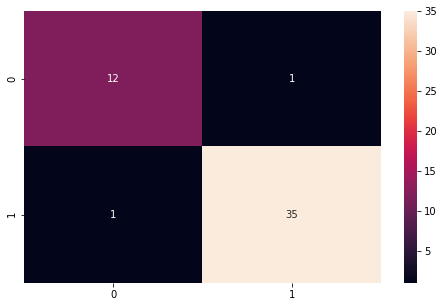

In [81]:
conf_matrix(knn_model)

In [82]:
class_report(knn_model)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.97      0.97      0.97        36

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49



<a id='8.4'></a>
## Bagging

In [83]:
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 81.31578947368419%
Bagging model score on Training data: 100.0%
Bagging model score on Testing data: 95.91836734693877%


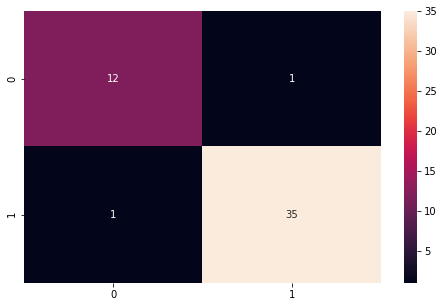

In [84]:
conf_matrix(bagg_model)

In [85]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.97      0.97      0.97        36

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49



<a id='8.5'></a>
## Gradient Boosting

In [103]:
gb_model = GradientBoostingClassifier(n_estimators=30)
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 87.05263157894736%
Boosting model score on Training data: 100.0%
Boosting model score on Testing data: 93.87755102040816%


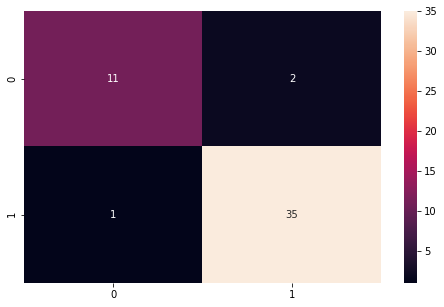

In [104]:
conf_matrix(gb_model)

In [105]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.97      0.97      0.97        36

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49



<a id='8.6'></a>
## Decision Tree

In [106]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 82.34210526315789%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 87.75510204081633%


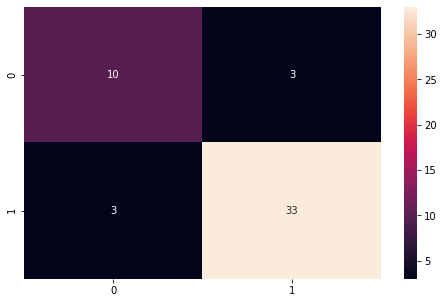

In [107]:
conf_matrix(dt_model)

In [108]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.92      0.92      0.92        36

    accuracy                           0.88        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.88      0.88      0.88        49



<a id='8.7'></a>
## SVM

In [122]:
svm_model = SVC(kernel='linear')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 79.73684210526316%
SVM model score on Training data: 91.0958904109589%
SVM model score on Testing data: 95.91836734693877%


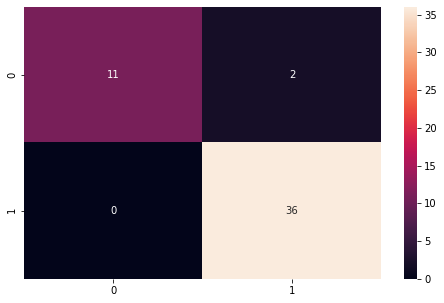

In [124]:
conf_matrix(svm_model)

In [125]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.95      1.00      0.97        36

    accuracy                           0.96        49
   macro avg       0.97      0.92      0.94        49
weighted avg       0.96      0.96      0.96        49



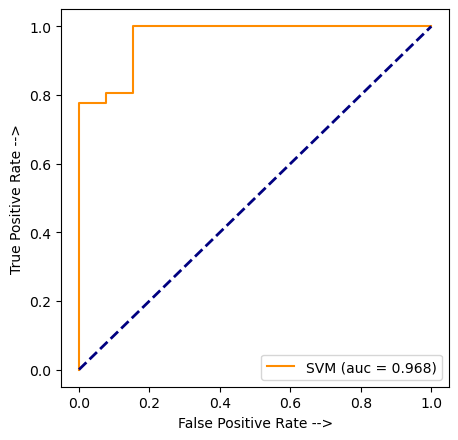

In [126]:
roc(svm_model, "SVM")

<a id='9'></a>
# TP, TN, FP, FN

In [127]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP) 
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"TP, FN, TP, FP Overall Accuarcy of {model_name}: {ACC*100}%")
    print(f"Sensitivity Accuarcy of {model_name}: {TPR * 100}%")
    print(f"Specificity Negative Rate Accuarcy of {model_name}: {TNR * 100}%")
    print(f"Negative predictive value Accuarcy of {model_name}: {NPV * 100}%")
    print(f"Fall out Accuarcy of {model_name}: {FPR * 100}%")
    print(f"False negative rate Accuarcy of {model_name}: {FNR * 100}%")
    print(f"False discovery rate Accuarcy of {model_name}: {FDR * 100}%")

<a id='9.1'></a>
## Logistic Regression

In [128]:
tp(lr_model, "Logistic Regression")

TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 91.83673469387756%
Sensitivity Accuarcy of Logistic Regression: 97.22222222222221%
Specificity Negative Rate Accuarcy of Logistic Regression: 76.92307692307693%
Negative predictive value Accuarcy of Logistic Regression: 90.9090909090909%
Fall out Accuarcy of Logistic Regression: 23.076923076923077%
False negative rate Accuarcy of Logistic Regression: 2.7777777777777777%
False discovery rate Accuarcy of Logistic Regression: 7.894736842105263%


<a id='9.2'></a>
## Random Forest

In [129]:
tp(rf_model, "Random Forest")

TP, FN, TP, FP Overall Accuarcy of Random Forest: 93.87755102040816%
Sensitivity Accuarcy of Random Forest: 97.22222222222221%
Specificity Negative Rate Accuarcy of Random Forest: 84.61538461538461%
Negative predictive value Accuarcy of Random Forest: 91.66666666666666%
Fall out Accuarcy of Random Forest: 15.384615384615385%
False negative rate Accuarcy of Random Forest: 2.7777777777777777%
False discovery rate Accuarcy of Random Forest: 5.405405405405405%


<a id='9.3'></a>
## KNN

In [130]:
tp(knn_model, "KNN")

TP, FN, TP, FP Overall Accuarcy of KNN: 95.91836734693877%
Sensitivity Accuarcy of KNN: 97.22222222222221%
Specificity Negative Rate Accuarcy of KNN: 92.3076923076923%
Negative predictive value Accuarcy of KNN: 92.3076923076923%
Fall out Accuarcy of KNN: 7.6923076923076925%
False negative rate Accuarcy of KNN: 2.7777777777777777%
False discovery rate Accuarcy of KNN: 2.7777777777777777%


<a id='9.4'></a>
## Bagging

In [131]:
tp(bagg_model, "Bagging")

TP, FN, TP, FP Overall Accuarcy of Bagging: 95.91836734693877%
Sensitivity Accuarcy of Bagging: 97.22222222222221%
Specificity Negative Rate Accuarcy of Bagging: 92.3076923076923%
Negative predictive value Accuarcy of Bagging: 92.3076923076923%
Fall out Accuarcy of Bagging: 7.6923076923076925%
False negative rate Accuarcy of Bagging: 2.7777777777777777%
False discovery rate Accuarcy of Bagging: 2.7777777777777777%


<a id='9.5'></a>
## Gradient Boosting

In [132]:
tp(gb_model, "Gradient Boosting")

TP, FN, TP, FP Overall Accuarcy of Gradient Boosting: 93.87755102040816%
Sensitivity Accuarcy of Gradient Boosting: 97.22222222222221%
Specificity Negative Rate Accuarcy of Gradient Boosting: 84.61538461538461%
Negative predictive value Accuarcy of Gradient Boosting: 91.66666666666666%
Fall out Accuarcy of Gradient Boosting: 15.384615384615385%
False negative rate Accuarcy of Gradient Boosting: 2.7777777777777777%
False discovery rate Accuarcy of Gradient Boosting: 5.405405405405405%


<a id='9.6'></a>
## Decision Tree

In [133]:
tp(dt_model, "Decision Tree")

TP, FN, TP, FP Overall Accuarcy of Decision Tree: 87.75510204081633%
Sensitivity Accuarcy of Decision Tree: 91.66666666666666%
Specificity Negative Rate Accuarcy of Decision Tree: 76.92307692307693%
Negative predictive value Accuarcy of Decision Tree: 76.92307692307693%
Fall out Accuarcy of Decision Tree: 23.076923076923077%
False negative rate Accuarcy of Decision Tree: 8.333333333333332%
False discovery rate Accuarcy of Decision Tree: 8.333333333333332%


<a id='9.7'></a>
## SVM

In [134]:
tp(svm_model, "SVM")

TP, FN, TP, FP Overall Accuarcy of SVM: 95.91836734693877%
Sensitivity Accuarcy of SVM: 100.0%
Specificity Negative Rate Accuarcy of SVM: 84.61538461538461%
Negative predictive value Accuarcy of SVM: 100.0%
Fall out Accuarcy of SVM: 15.384615384615385%
False negative rate Accuarcy of SVM: 0.0%
False discovery rate Accuarcy of SVM: 5.263157894736842%


<a id='10'></a>
# Auto ML

In [24]:
tpot_model = TPOTClassifier(generations=10, population_size=200, 
                           verbosity=2, cv=10, random_state=10)
tpot_model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/2200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9323809523809524

Generation 2 - Current best internal CV score: 0.959047619047619

Generation 3 - Current best internal CV score: 0.959047619047619

Generation 4 - Current best internal CV score: 0.959047619047619

Generation 5 - Current best internal CV score: 0.9595238095238094

Generation 6 - Current best internal CV score: 0.9595238095238094

Generation 7 - Current best internal CV score: 0.9657142857142856

Generation 8 - Current best internal CV score: 0.9657142857142856

Generation 9 - Current best internal CV score: 0.9728571428571428

Generation 10 - Current best internal CV score: 0.9728571428571428

Best pipeline: DecisionTreeClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=9, max_features=0.6500000000000001, min_samples_leaf=19, min_samples_split=2, n_estimators=100, subsample=1.0), criterion=gini, max_depth=2, min_samples_leaf=14, min_samples_split=14)


TPOTClassifier(cv=10, generations=10, population_size=200, random_state=10,
               verbosity=2)

In [25]:
tpot_model.score(X_test, y_test)

0.9591836734693877

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

In [26]:
y_pred = tpot_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.97      0.97      0.97        36

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49



<a id='9.2'></a>
***Confusion Matrix***

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  1],
       [ 1, 35]], dtype=int64)

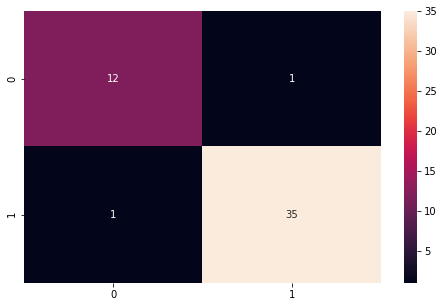

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True);

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>